# Image caption Generator

Image caption generator system using NasNet as a Feature extractor + (LSTM)

import libraries

In [220]:
import numpy as np 
import pandas as pd
import os
import cv2
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications.nasnet import preprocess_input


**Load Images**

In [221]:

images = []
for img in glob.glob("../input/flickr-image-dataset/flickr30k_images/flickr30k_images/*.jpg"):
    print(img)
    images.append(img)
    if len(images)==20:
        break 
        


../input/flickr-image-dataset/flickr30k_images/flickr30k_images/2715746315.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/3463034205.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/268704620.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/2673564214.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/7535037918.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/4912369161.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/4828071602.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/6802728196.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/3346289227.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/3217056901.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/272471327.jpg
../input/flickr-image-dataset/flickr30k_images/flickr30k_images/4717261252.jpg
../input/flickr-image-dataset/flickr30k_images/flickr3

Visualize

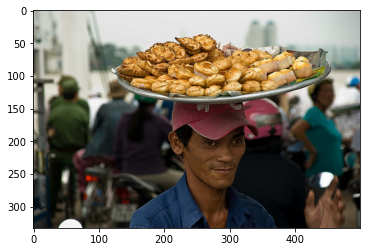

In [222]:

img = "../input/flickr-image-dataset/flickr30k_images/flickr30k_images/2715746315.jpg"
x = plt.imread(img)
plt.imshow(x)
plt.show()

In [223]:

pro_img = []

for img in tqdm(images):
    image = cv2.imread(img)
    pro_img.append(image)
pro_img = np.asarray(pro_img)

100%|██████████| 20/20 [00:00<00:00, 129.54it/s]


define param's

In [224]:
size = 256
num_channels = 3

Download Model

In [225]:

modelNAS = NASNetLarge(include_top=True,weights='imagenet')
modelNAS.summary()


Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_45[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1040 (Activation)    (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

__________________________________________________________________________________________________
separable_conv_2_bn_normal_left (None, 21, 21, 336)  1344        separable_conv_2_normal_left2_7[0
__________________________________________________________________________________________________
separable_conv_2_bn_normal_righ (None, 21, 21, 336)  1344        separable_conv_2_normal_right2_7[
__________________________________________________________________________________________________
normal_left3_7 (AveragePooling2 (None, 21, 21, 336)  0           normal_bn_1_7[0][0]              
__________________________________________________________________________________________________
normal_left4_7 (AveragePooling2 (None, 21, 21, 336)  0           adjust_bn_7[0][0]                
__________________________________________________________________________________________________
normal_right4_7 (AveragePooling (None, 21, 21, 336)  0           adjust_bn_7[0][0]                
__________

__________________________________________________________________________________________________
activation_1244 (Activation)    (None, 11, 11, 672)  0           separable_conv_1_bn_normal_right1
__________________________________________________________________________________________________
activation_1246 (Activation)    (None, 11, 11, 672)  0           separable_conv_1_bn_normal_left2_
__________________________________________________________________________________________________
activation_1248 (Activation)    (None, 11, 11, 672)  0           separable_conv_1_bn_normal_right2
__________________________________________________________________________________________________
activation_1250 (Activation)    (None, 11, 11, 672)  0           separable_conv_1_bn_normal_left5_
__________________________________________________________________________________________________
separable_conv_2_normal_left1_1 (None, 11, 11, 672)  468384      activation_1242[0][0]            
__________

Preprocess Images and creating Text data

In [226]:

train = []
for i in pro_img:
    img = cv2.resize(i,(size,size))
    print(img.shape)
    img = preprocess_input(img)
    
    img = modelNAS.predict(img.reshape( (1,) + img.shape[:3]))
    train.append(img)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [227]:
train = np.vstack(train[:])

In [228]:
train.shape

(20, 1000)

**Preprocessing Text**

In [229]:
captions = pd.read_csv('../input/flickr-image-dataset/flickr30k_images/results.csv', delimiter='|')
captions

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ..."


In [230]:
captions.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

In [231]:
image_data = os.listdir('../input/flickr-image-dataset/flickr30k_images/flickr30k_images/')
image_data = images
caption = []
def map_image2cap(image_data, captions):
    for i in image_data:
        caption.append(captions['../input/flickr-image-dataset/flickr30k_images/flickr30k_images/'+captions['image_name'] == i][' comment'].iat[0])

In [232]:
map_image2cap(image_data, captions)

In [233]:
captions = np.array(caption)

In [234]:
len(captions)

20

In [235]:
def avoid_single_char(cap):
    st = ""
    for word in cap.split():
        if len(word) > 1:
            st += " " + word
    return st

In [236]:
start_tag = '<start>'
end_tag = '<end>'

In [237]:
import re
import string
l = []
seq = []
for cap in captions:
    cap = cap.translate(str.maketrans('','',string.punctuation))
    cap = avoid_single_char(cap)
    cap = re.sub('[0-9]', '', cap)
    cap = re.sub(' +',' ',cap)
    cap = start_tag + ' ' +cap+ ' ' + end_tag
    seq.append(cap)


In [238]:
len(seq)

20

In [239]:
data = []
index = 0
for i, s in zip(image_data,seq):
    data.append([i,index,s])
    index = index + 1

In [240]:
len(data)

20

In [241]:

df = pd.DataFrame(data,columns=["filename","index","caption"])
df

,filename,index,caption
0,../input/flickr-image-dataset/flickr30k_images...,0,<start> man wearing red hat and blue top carr...
1,../input/flickr-image-dataset/flickr30k_images...,1,<start> boy is doing tricks with his bike on ...
2,../input/flickr-image-dataset/flickr30k_images...,2,<start> Two white dogs are running along side...
3,../input/flickr-image-dataset/flickr30k_images...,3,<start> young boy poses behind the netting of...
4,../input/flickr-image-dataset/flickr30k_images...,4,<start> member of ZZ Top is playing guitar co...
5,../input/flickr-image-dataset/flickr30k_images...,5,<start> blond gymnast wearing black suit with...
6,../input/flickr-image-dataset/flickr30k_images...,6,<start> woman with white shirt is standing ne...
7,../input/flickr-image-dataset/flickr30k_images...,7,<start> Two young girls make funny faces out ...
8,../input/flickr-image-dataset/flickr30k_images...,8,<start> man is rollerblading down white raili...
9,../input/flickr-image-dataset/flickr30k_images...,9,<start> Three young girls posing for picture ...


In [242]:
from keras.preprocessing.text import Tokenizer

count_words=22000
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(df.caption)
vocab = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
texts = tokenizer.texts_to_sequences(df.caption)


In [243]:
len(vocab)

193

In [244]:
maxlen = np.max([len(text) for text in dtexts])

In [245]:
len(train)

20

In [246]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocess(dtexts,dimages):

    Xt, Xi, yt = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            inp, out = text[:i], text[i]
            inp = pad_sequences([inp],maxlen=maxlen).flatten()
            out = to_categorical(out,num_classes = vocab_size)

            Xt.append(inp)
            Xi.append(image)
            yt.append(out)

    Xtext  = np.array(Xt)
    Ximage = np.array(Xi)
    ytext  = np.array(yt)

    return(Xtext,Ximage,ytext)


Xtt, Xit, ytt = preprocess(texts,train)



MODEL

In [247]:
from keras import layers, models

inp1 = layers.Input(shape=(Xit.shape[1],))
l1 = layers.Dropout(0.5)(inp1)
l2 = layers.Dense(256, activation='relu')(l1)

    #sequence encoder model
inp2 = layers.Input(shape=(maxlen,))
l_1 = layers.Embedding(vocab_size, 256)(inp2)
l_2 = layers.Dropout(0.5)(l_1)
l_3 = layers.LSTM(256)(l_2)

    #decoder model
f1 = layers.Add()([l2, l_3])
f2 = layers.Dense(256, activation='relu')(f1)
f3 = layers.Dense(vocab_size, activation='softmax')(f2)

model = models.Model(inputs=[inp1, inp2], outputs=f3)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = 'accuracy')
model.summary()


Model: "functional_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           [(None, 35)]         0                                            
__________________________________________________________________________________________________
input_46 (InputLayer)           [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 35, 256)      49664       input_47[0][0]                   
__________________________________________________________________________________________________
dropout_38 (Dropout)            (None, 1000)         0           input_46[0][0]                   
______________________________________________________________________________________

In [248]:
Xtt.shape, Xit.shape, ytt.shape

((336, 35), (336, 1000), (336, 194))

Training

In [249]:
import time
start = time.time()
hist = model.fit([Xit, Xtt], ytt, 
                  epochs=50, verbose=2, 
                  batch_size=64)

Epoch 1/50
6/6 - 1s - loss: 5.2627 - accuracy: 0.0268
Epoch 2/50
6/6 - 1s - loss: 5.1399 - accuracy: 0.0714
Epoch 3/50
6/6 - 1s - loss: 4.9638 - accuracy: 0.0595
Epoch 4/50
6/6 - 1s - loss: 4.8717 - accuracy: 0.0625
Epoch 5/50
6/6 - 1s - loss: 4.8100 - accuracy: 0.0833
Epoch 6/50
6/6 - 1s - loss: 4.7583 - accuracy: 0.0744
Epoch 7/50
6/6 - 1s - loss: 4.7164 - accuracy: 0.0893
Epoch 8/50
6/6 - 1s - loss: 4.6577 - accuracy: 0.0833
Epoch 9/50
6/6 - 1s - loss: 4.5837 - accuracy: 0.0952
Epoch 10/50
6/6 - 1s - loss: 4.5321 - accuracy: 0.0863
Epoch 11/50
6/6 - 1s - loss: 4.4457 - accuracy: 0.1042
Epoch 12/50
6/6 - 1s - loss: 4.3700 - accuracy: 0.0982
Epoch 13/50
6/6 - 1s - loss: 4.3123 - accuracy: 0.1161
Epoch 14/50
6/6 - 1s - loss: 4.2372 - accuracy: 0.1190
Epoch 15/50
6/6 - 1s - loss: 4.1816 - accuracy: 0.1012
Epoch 16/50
6/6 - 1s - loss: 4.0916 - accuracy: 0.1220
Epoch 17/50
6/6 - 1s - loss: 4.0347 - accuracy: 0.1310
Epoch 18/50
6/6 - 1s - loss: 3.9251 - accuracy: 0.1310
Epoch 19/50
6/6 - 1

Predictions

In [250]:
def word_index(yhat, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == yhat:
            return word
    return None
 


def get_caption(model, tokenizer, photo, max_length):
 
    in_text = '<start>'

    for i in range(max_length):
       
        sequence = tokenizer.texts_to_sequences([in_text])[0]
     
        sequence = pad_sequences([sequence], maxlen=max_length)
       
        yhat = model.predict([photo,sequence], verbose=0)

        yhat = np.argmax(yhat)
     
        word = word_index(yhat, tokenizer)

        if word is None:
            break
        
        in_text += ' ' + word
    
        if word == '<end>':
            break

    return in_text.replace("<start>","").replace("<end>","")

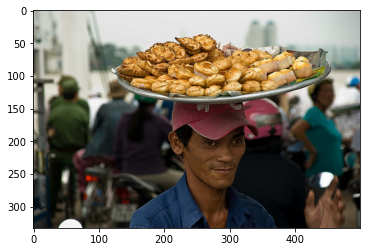

' man in blue blue blue top is tray on on head with filled with some sort of baked goods end end end end end end end end end end end end end end end end'

In [251]:
image = '../input/flickr-image-dataset/flickr30k_images/flickr30k_images/2715746315.jpg'

img = cv2.imread(image)
img = cv2.resize(img,(256,256))
img = preprocess_input(img)
img = modelNAS.predict(img.reshape( (1,) + img.shape[:3]))
image = plt.imread(image)
image = plt.imshow(image)
image = plt.show(image)
get_caption(model, tokenizer, img, maxlen)

In [ ]:
#working good